# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import emdat BDD

In [2]:
path = "C:\\batch8_worldbank\\datasets\\tempetes\\wb_disasters_bdd.xlsx"

In [3]:
disasters_df = pd.read_excel(path)
disasters_df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1904-0003-BGD,1904,3,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,OFDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
3,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
4,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300


In [4]:
disasters_df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

In [5]:
disasters_df["Disaster Type"].value_counts()

Flood                  5277
Storm                  4328
Drought                 747
Extreme temperature     597
Name: Disaster Type, dtype: int64

In [6]:
disasters_df.dtypes

Dis No                              object
Year                                 int64
Seq                                  int64
Disaster Group                      object
Disaster Subgroup                   object
Disaster Type                       object
Disaster Subtype                    object
Disaster Subsubtype                 object
Event Name                          object
Entry Criteria                      object
Country                             object
ISO                                 object
Region                              object
Continent                           object
Location                            object
Origin                              object
Associated Dis                      object
Associated Dis2                     object
OFDA Response                       object
Appeal                              object
Declaration                         object
Aid Contribution                   float64
Dis Mag Value                      float64
Dis Mag Sca

# Filter on storms

In [7]:
storms_df = disasters_df[disasters_df["Disaster Type"]=="Storm"]

In [8]:
storms_df.shape

(4328, 43)

In [9]:
storms_df['Country'].value_counts()

United States of America (the)    651
Philippines (the)                 365
China                             312
India                             202
Japan                             183
                                 ... 
Serbia Montenegro                   1
Sint Maarten (Dutch part)           1
Saint Barthélemy                    1
Togo                                1
Botswana                            1
Name: Country, Length: 193, dtype: int64

In [10]:
storms_df['ISO'].value_counts()

USA    651
PHL    365
CHN    312
IND    202
JPN    183
      ... 
MAF      1
ERI      1
TGO      1
NER      1
GIN      1
Name: ISO, Length: 193, dtype: int64

### Number of storms over the years

In [14]:
nb_storms_by_year = storms_df.groupby(["Start Year"]).aggregate({"Disaster Type":"count", "No Affected": "sum", "Total Damages ('000 US$)":"sum"}).rename(columns={"Disaster Type":"storm_count", "No Affected": "total_nb_affected", "Total Damages ('000 US$)": "total_damages"})

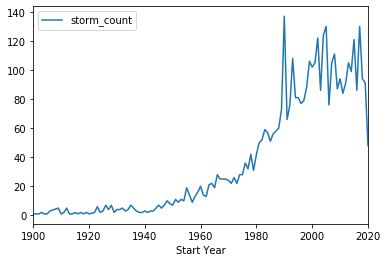

In [15]:
nb_storms_by_year.plot(y='storm_count', use_index=True)
plt.show()

In [16]:
nb_storms_by_year.head()

,storm_count,No Affected,total_damages
Start Year,,,
1900,1,0.0,30000.0
1902,1,0.0,0.0
1903,2,0.0,0.0
1904,1,0.0,0.0
1905,1,0.0,0.0


### Number of storms, nb people affected and total damages by country by decade

In [22]:
nb_storms_by_year_by_country = storms_df.groupby(["Start Year", "ISO"]).aggregate({"Disaster Type":"count", "No Affected": "sum", "Total Damages ('000 US$)":"sum"})
nb_storms_by_year_by_country = nb_storms_by_year_by_country.reset_index()
nb_storms_by_year_by_country = nb_storms_by_year_by_country.rename(columns={"Start Year": "year", "Disaster Type": "storms_count", "No Affected": "total_nb_affected", "Total Damages ('000 US$)": "total_damages"})
#nb_storms_by_year_by_country = nb_storms_by_year_by_country.set_index('year')

In [23]:
nb_storms_by_year_by_country.head()

,year,ISO,storms_count,total_nb_affected,total_damages
0,1900,USA,1,0.0,30000.0
1,1902,MMR,1,0.0,0.0
2,1903,JAM,1,0.0,0.0
3,1903,USA,1,0.0,0.0
4,1904,BGD,1,0.0,0.0


In [24]:
nb_storms_by_year_by_country["decade"] = nb_storms_by_year_by_country["year"].apply(lambda row: (row//10)*10)
nb_storms_by_decade_by_country = nb_storms_by_year_by_country.groupby(["decade", "ISO"]).aggregate({"storms_count":"sum", "total_nb_affected":"sum", "total_damages":"sum"})
nb_storms_by_decade_by_country = nb_storms_by_decade_by_country.reset_index()
nb_storms_by_decade_by_country.head()

,decade,ISO,storms_count,total_nb_affected,total_damages
0,1900,BGD,3,0.0,0.0
1,1900,HKG,1,0.0,20000.0
2,1900,HTI,1,0.0,0.0
3,1900,JAM,1,0.0,0.0
4,1900,MMR,1,0.0,0.0


(0, 75)

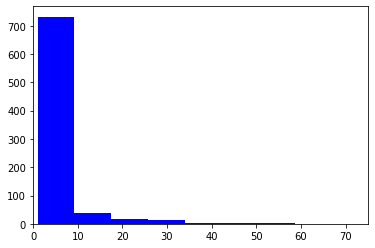

In [25]:
plt.hist(nb_storms_by_decade_by_country["storms_count"], color='b', label='storms_count', bins=20)
plt.xlim(0,75)

In [26]:
nb_storms_by_decade_by_country["storms_count"].describe()

count    819.000000
mean       5.284493
std       12.996554
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      166.000000
Name: storms_count, dtype: float64

In [27]:
nb_storms_by_decade_by_country["ISO"].nunique()

193

In [28]:
nb_storms_by_decade_by_country[nb_storms_by_decade_by_country["storms_count"]==166].head()

,decade,ISO,storms_count,total_nb_affected,total_damages
477,1990,USA,166,3374036.0,85610950.0


### Correlation matrix between number of storms, total_nb_affected and total_damages

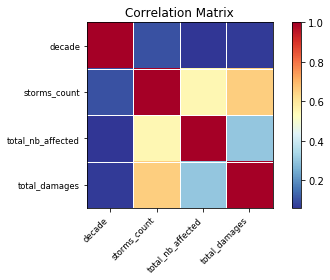

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

corr = nb_storms_by_decade_by_country.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Sea surface temperature (NOAA)

In [32]:
path = "C:\\batch8_worldbank\\datasets\\tempetes\\average_global_sea_surface_temperatures.xlsx"

In [33]:
sea_surface_temperature_df = pd.read_excel(path)
sea_surface_temperature_df.head()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,1880,-0.470009,-0.672646,-0.267371
1,1881,-0.356879,-0.560588,-0.153169
2,1882,-0.372661,-0.575728,-0.169594
3,1883,-0.448443,-0.650804,-0.246082
4,1884,-0.589754,-0.790478,-0.389030


In [34]:
sea_surface_temperature_df["decade"] = sea_surface_temperature_df["Year"].apply(lambda row: (row//10)*10)
sea_surface_temperature_df.head()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval,decade
0,1880,-0.470009,-0.672646,-0.267371,1880
1,1881,-0.356879,-0.560588,-0.153169,1880
2,1882,-0.372661,-0.575728,-0.169594,1880
3,1883,-0.448443,-0.650804,-0.246082,1880
4,1884,-0.589754,-0.790478,-0.389030,1880


In [38]:
avg_sea_surface_temperature_by_decade = sea_surface_temperature_df.groupby(["decade"]).aggregate({"Annual anomaly":"mean"})
avg_sea_surface_temperature_by_decade = avg_sea_surface_temperature_by_decade.reset_index().rename(columns={"Annual anomaly":"annual_anomaly_farenheit"})
avg_sea_surface_temperature_by_decade.head()

,decade,annual_anomaly_farenheit
0,1880,-0.529539
1,1890,-0.699908
2,1900,-0.894984
3,1910,-0.828981
4,1920,-0.741097


In [42]:
avg_sea_surface_temperature_by_decade["annual_anomaly_farenheit"].describe()

count    14.000000
mean     -0.293280
std       0.481242
min      -0.894984
25%      -0.674404
50%      -0.369249
75%      -0.006243
max       0.640266
Name: annual_anomaly_farenheit, dtype: float64

### Enrichment of number of storms by country by decade with average global ocean temperatures

In [39]:
nb_storms_by_decade_by_country_ocean_temp_enriched = pd.merge(nb_storms_by_decade_by_country, avg_sea_surface_temperature_by_decade, on="decade", how="left")

In [40]:
nb_storms_by_decade_by_country_ocean_temp_enriched.head()

,decade,ISO,storms_count,total_nb_affected,total_damages,annual_anomaly_farenheit
0,1900,BGD,3,0.0,0.0,-0.894984
1,1900,HKG,1,0.0,20000.0,-0.894984
2,1900,HTI,1,0.0,0.0,-0.894984
3,1900,JAM,1,0.0,0.0,-0.894984
4,1900,MMR,1,0.0,0.0,-0.894984


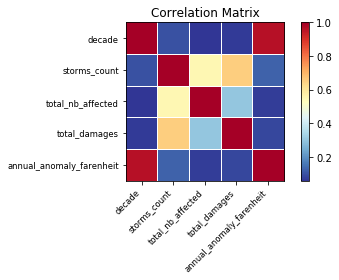

In [41]:
corr = nb_storms_by_decade_by_country_ocean_temp_enriched.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Analysis of correlations starting from 1970

In [43]:
nb_storms_by_decade_by_country_ocean_temp_enriched_recent = nb_storms_by_decade_by_country_ocean_temp_enriched[nb_storms_by_decade_by_country_ocean_temp_enriched["decade"]>=1970]
nb_storms_by_decade_by_country_ocean_temp_enriched_recent.head()

,decade,ISO,storms_count,total_nb_affected,total_damages,annual_anomaly_farenheit
185,1970,AIA,1,0.0,0.0,-0.269292
186,1970,ARG,4,100000.0,0.0,-0.269292
187,1970,AUS,20,45100.0,2624815.0,-0.269292
188,1970,AUT,1,0.0,0.0,-0.269292
189,1970,BEL,2,0.0,0.0,-0.269292


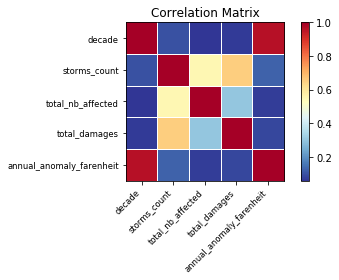

In [44]:
corr = nb_storms_by_decade_by_country_ocean_temp_enriched.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Sea surface temperatureHadSST.4 global sea surface temperature dataset